<a href="https://colab.research.google.com/github/TandasaNiriksha/BharatIntern-TandasaNiriksha/blob/main/NUMBER_RECOGNISATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 3:**

# **Number Recognisation**

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from tensorflow.keras.utils import img_to_array
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from pathlib import Path
from tensorflow.keras.utils import load_img

import numpy as np
import matplotlib.pyplot as plt
from numpy import argmax

In [ ]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
X_train= X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [ ]:
y_train= to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
model_cnn=Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding='same',activation='relu'))
model_cnn.add(MaxPooling2D())
model_cnn.add(Conv2D(32, kernel_size=(3,3),padding='same',activation='relu'))
model_cnn.add(MaxPooling2D())
model_cnn.add(Flatten())
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dense(10,activation='softmax'))
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
print(model_cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
history_model_cnn= model_cnn.fit(X_train, y_train, epochs=12, verbose=1, validation_data=(X_train, y_train))

Epoch 1/12
1875/1875 [==============================] - 102s 52ms/step - loss: 0.1447 - accuracy: 0.9563 - val_loss: 0.0515 - val_accuracy: 0.9838
Epoch 2/12
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0313 - val_accuracy: 0.9902
Epoch 3/12
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.0195 - val_accuracy: 0.9940
Epoch 4/12
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0153 - val_accuracy: 0.9955
Epoch 5/12
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0127 - val_accuracy: 0.9961
Epoch 6/12
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0106 - val_accuracy: 0.9963
Epoch 7/12
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0056 

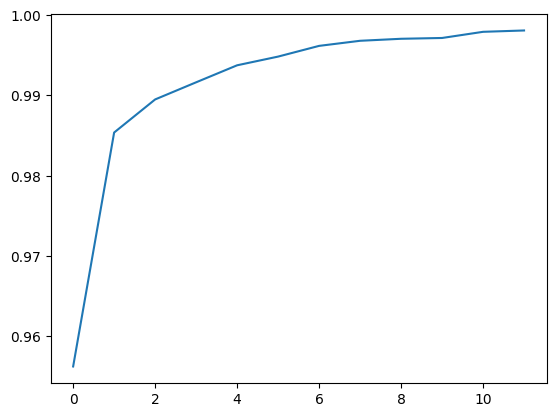

In [ ]:
plt.plot(history_model_cnn.history['accuracy'])

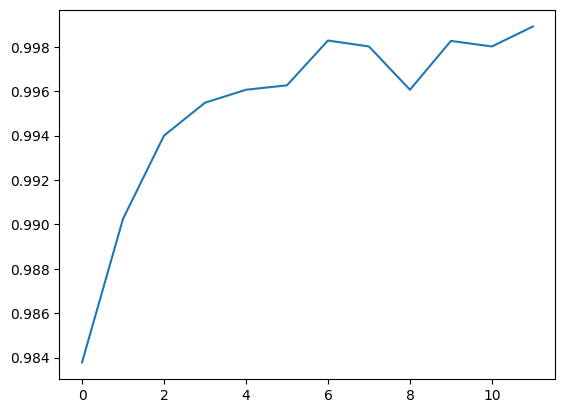

In [ ]:
plt.plot(history_model_cnn.history['val_accuracy'])

In [ ]:
model_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0423 - accuracy: 0.9898


[0.04226577281951904, 0.989799976348877]

1/1 [==============================] - 0s 126ms/step
9


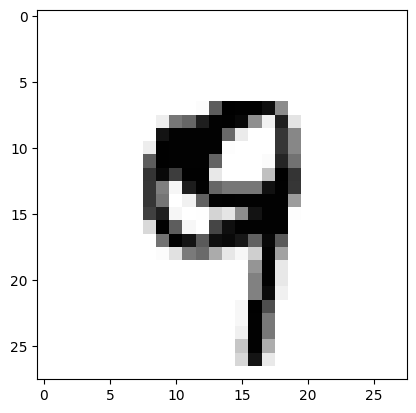

In [ ]:
image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_cnn.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 26ms/step
1


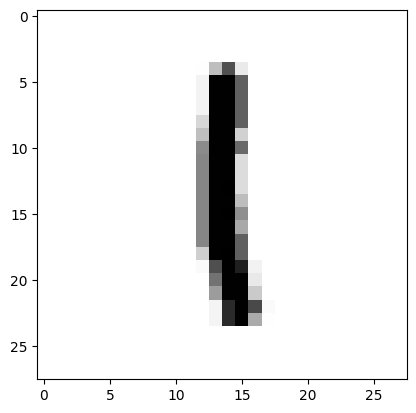

In [ ]:
image_index = 1008
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_cnn.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 29ms/step
6


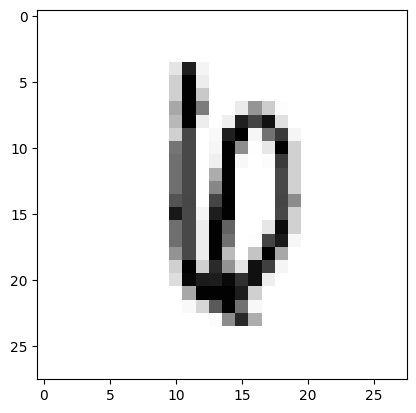

In [ ]:
image_index = 3030
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_cnn.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())